### TÍtulo do Projeto: "Análise e Diagnóstico Automatizado por Inteligência Artificial em Falhas em Exaustores Industriais"

Nome do dataset: MAFAULDA Machinery Fault Database
Descrição:  
Este banco de dados é composto de 1951 séries temporais multivariadas adquiridas por sensores em um simulador de falhas de máquinas (MFS) Alinhamento-Balanço-Vibração (ABVT) da SpectraQuest. O 1951 compreende seis diferentes estados simulados: função normal, falha de desequilíbrio, falhas de desalinhamento horizontal e vertical e falhas de rolamento interno e externo
Link: http://www02.smt.ufrj.br/~offshore/mfs/page_01.html Acesso em 10/08/2022.

Dicionário de variáveis:

Coluna 1 -  Sinal do tacômetro medidor da rotação do equipamento;

Colunas 2 a 4 - Acelerômetro LA (axial, direção radial tangencial);

Colunas 5 a 7 - Acelerômetro LOA (axial, direção radial tangencial);

Coluna 8 - Microfone

#### Avaliação do melhor momento de coleta dos dados
Este jupyter tem como finalidade visualizar os dados nas diferentes falhas de modo a possibilitar entender o melhor momento a extrair os dados para criação de um dataset geral a partir da concatenação.

CARREGANDO DADOS DO EQUIPAMENTO DESABALANCEADO

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import glob

In [2]:
# Criando os dataframes e nomeando as colunas
dataframes = []
for arquivo in glob.glob(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\imbalance\35g\*csv'):
    dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))

In [3]:
print(len(dataframes))

45


In [4]:
desbal = dataframes[1]

<AxesSubplot:>

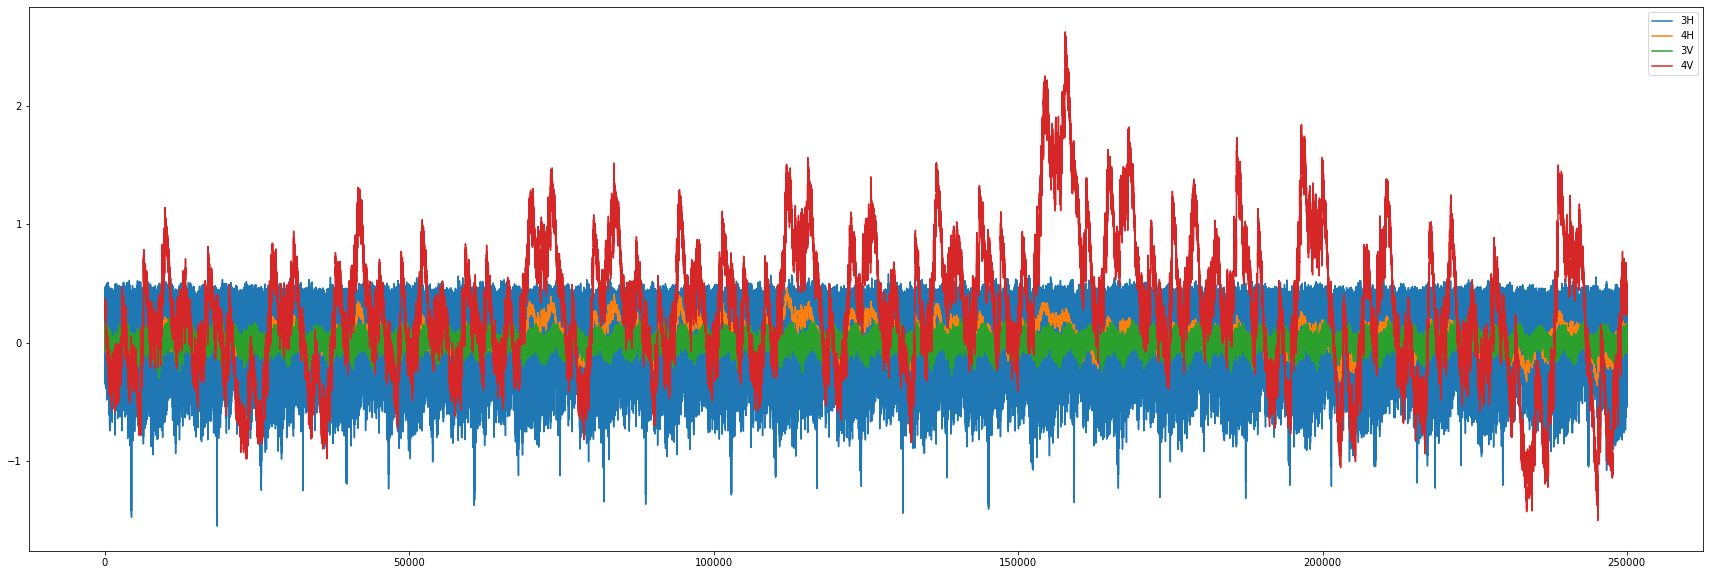

In [5]:
desbal[['3H','4H','3V','4V']].plot(figsize=(30,10))


In [6]:
desbal.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,-0.65934,-0.72790,0.288920,0.120290,1.0589,0.020169,0.29887,-0.073499
1,-0.60608,0.76591,0.168580,0.111700,1.0956,0.026426,0.36858,0.098838
2,-0.65242,-1.71200,0.032482,0.065715,1.0523,0.017974,0.29209,0.021833
3,-0.61403,1.17200,0.397080,0.110180,1.1059,0.024591,0.36896,-0.041154
4,-0.64529,-1.45590,-0.080561,0.012328,1.0523,0.017320,0.28311,0.220110


In [7]:
desbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Tacômetro  250000 non-null  float64
 1   3A         250000 non-null  float64
 2   3H         250000 non-null  float64
 3   3V         250000 non-null  float64
 4   4A         250000 non-null  float64
 5   4H         250000 non-null  float64
 6   4V         250000 non-null  float64
 7   Microfone  250000 non-null  float64
dtypes: float64(8)
memory usage: 15.3 MB


<AxesSubplot:>

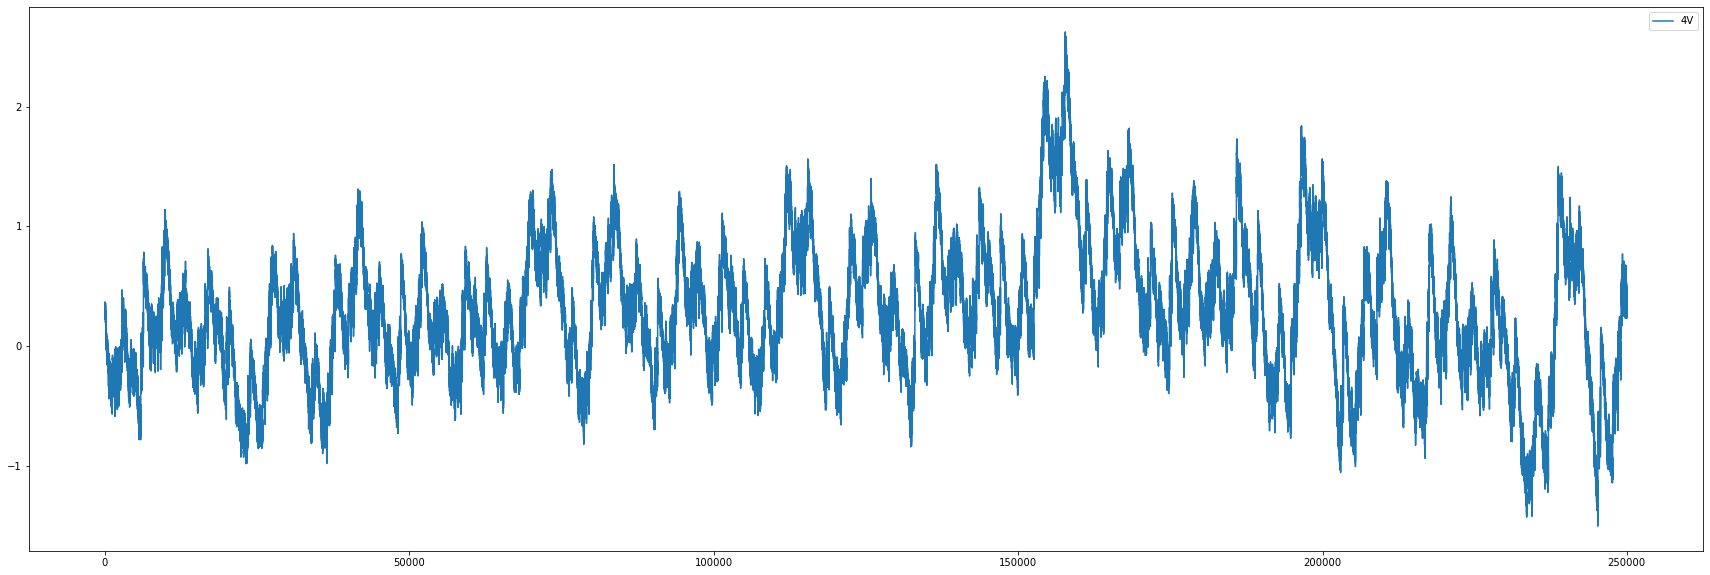

In [8]:
desbal[['4V']].plot(figsize=(30,10))

<AxesSubplot:>

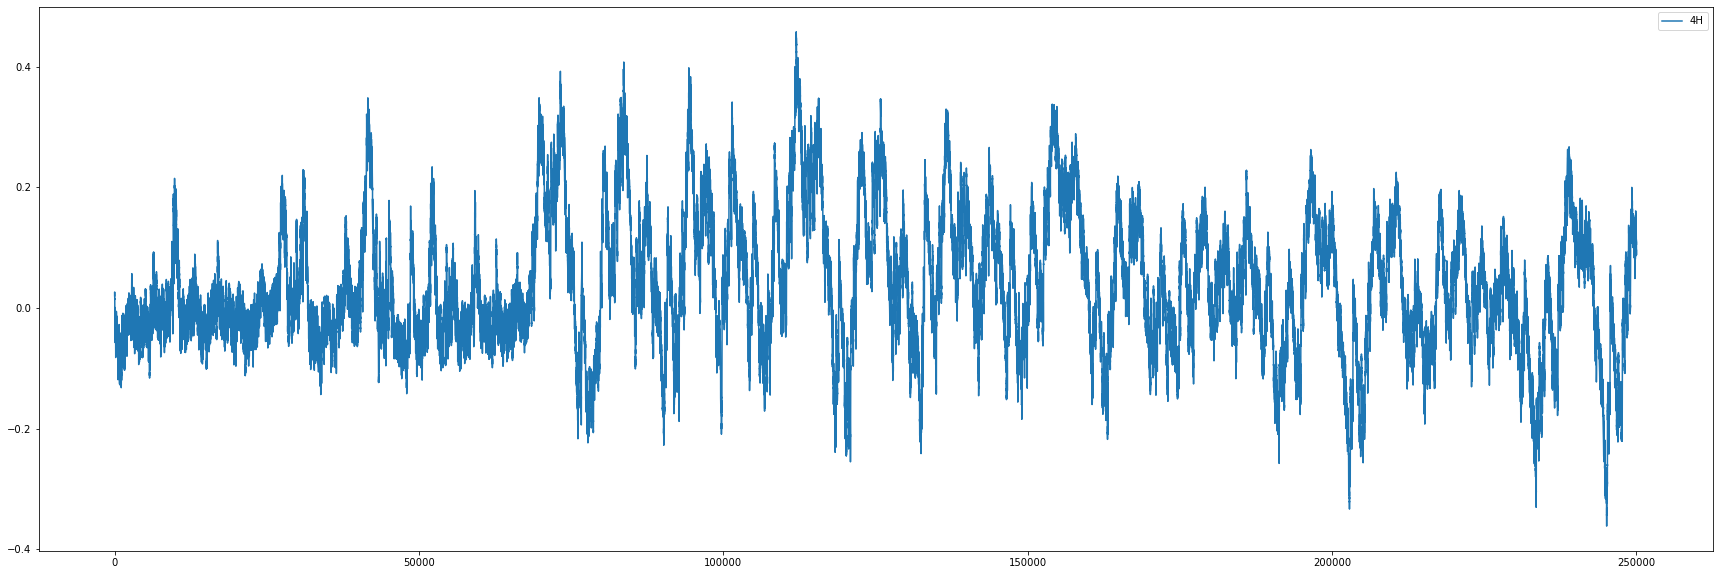

In [9]:
desbal[['4H']].plot(figsize=(30,10))

<AxesSubplot:>

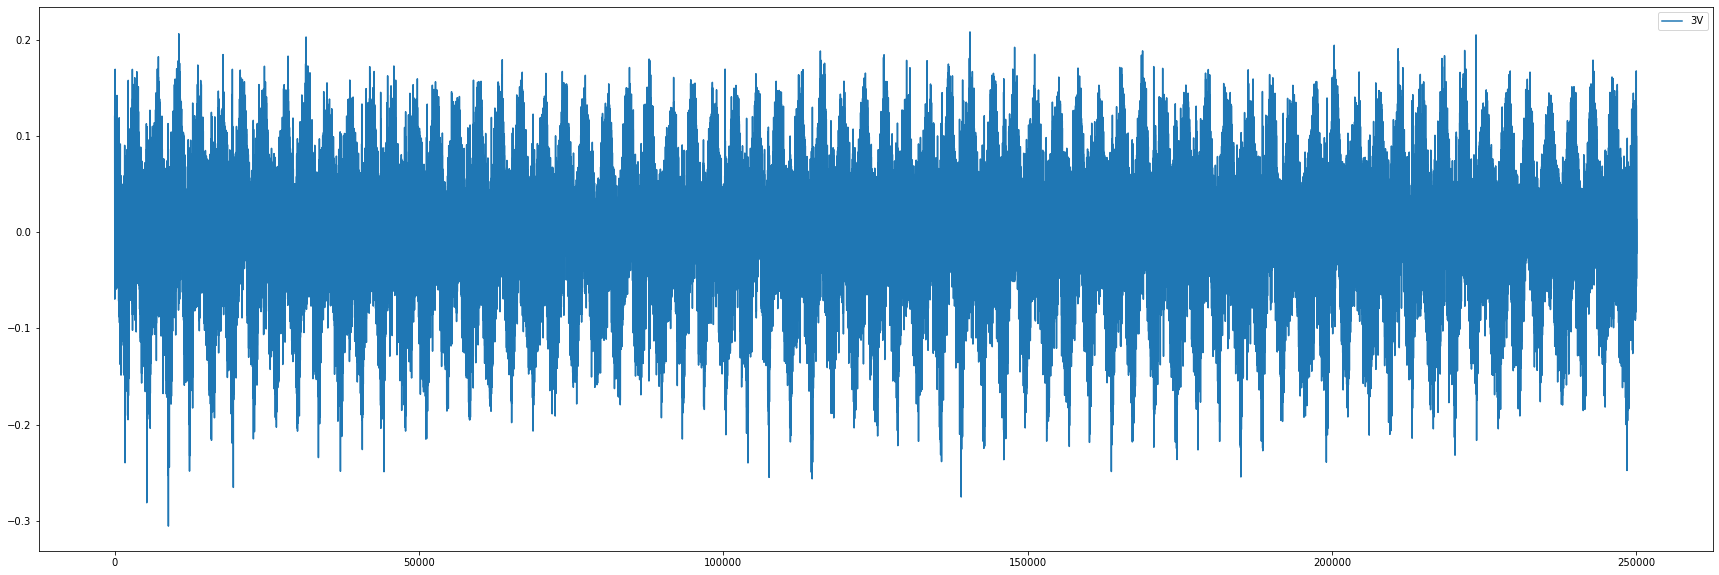

In [10]:
desbal[['3V']].plot(figsize=(30,10))

<AxesSubplot:>

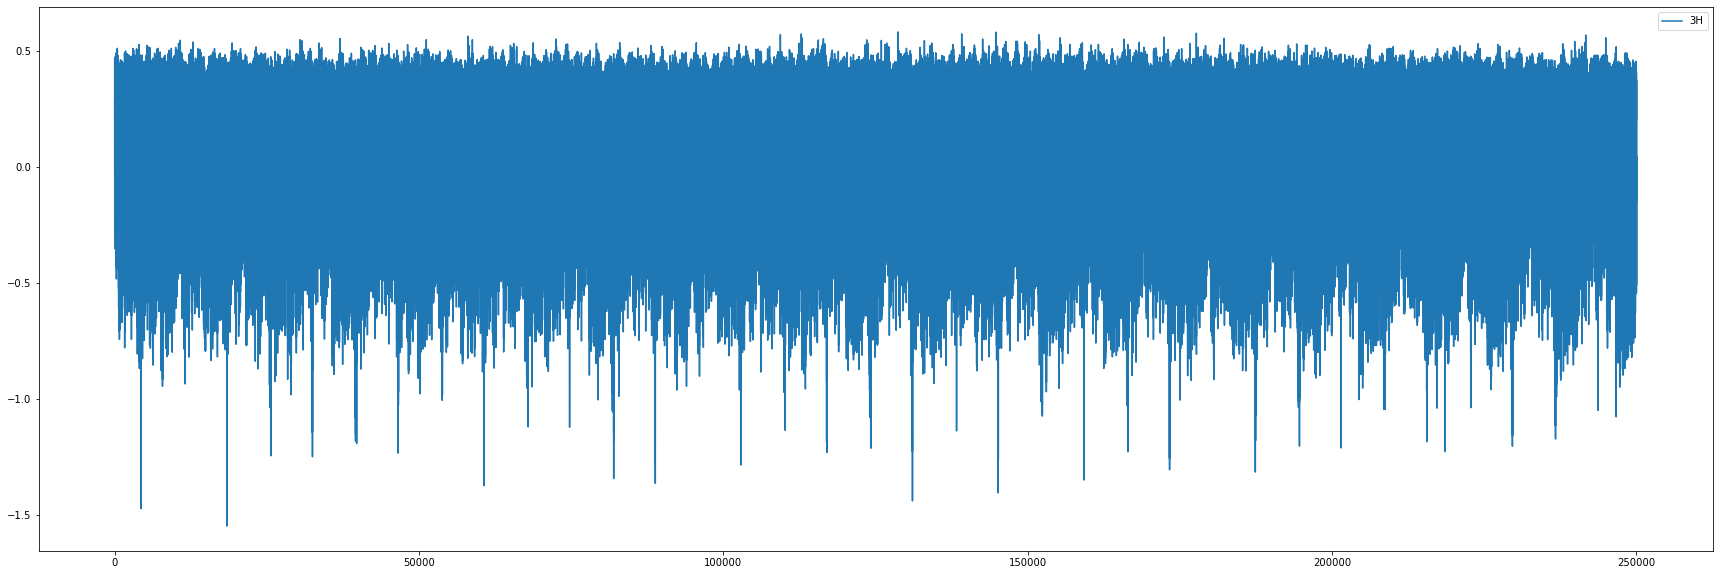

In [11]:
desbal[['3H']].plot(figsize=(30,10))

CARREGANDO DADOS DO EQUIPAMENTO NORMAL

In [12]:
normal = pd.read_csv(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\normal\normal.csv', sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone'])

In [13]:
normal.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,-0.68818,-0.019834,-0.18531,0.008256,0.070510,0.024071,-0.47643,-0.26808
1,-0.61705,-0.390150,-0.88854,-0.228070,0.047241,0.020060,-0.47750,0.34212
2,-0.58275,-0.158920,-0.17636,-0.203940,0.054428,0.021222,-0.44477,-0.27572
3,-0.68089,-0.284540,-0.74847,-0.189420,0.053131,0.024681,-0.49282,0.24577
4,-0.62511,-0.669300,-0.42738,-0.051529,0.043940,0.022236,-0.55272,-0.10115


In [14]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Tacômetro  250000 non-null  float64
 1   3A         250000 non-null  float64
 2   3H         250000 non-null  float64
 3   3V         250000 non-null  float64
 4   4A         250000 non-null  float64
 5   4H         250000 non-null  float64
 6   4V         250000 non-null  float64
 7   Microfone  250000 non-null  float64
dtypes: float64(8)
memory usage: 15.3 MB


<AxesSubplot:>

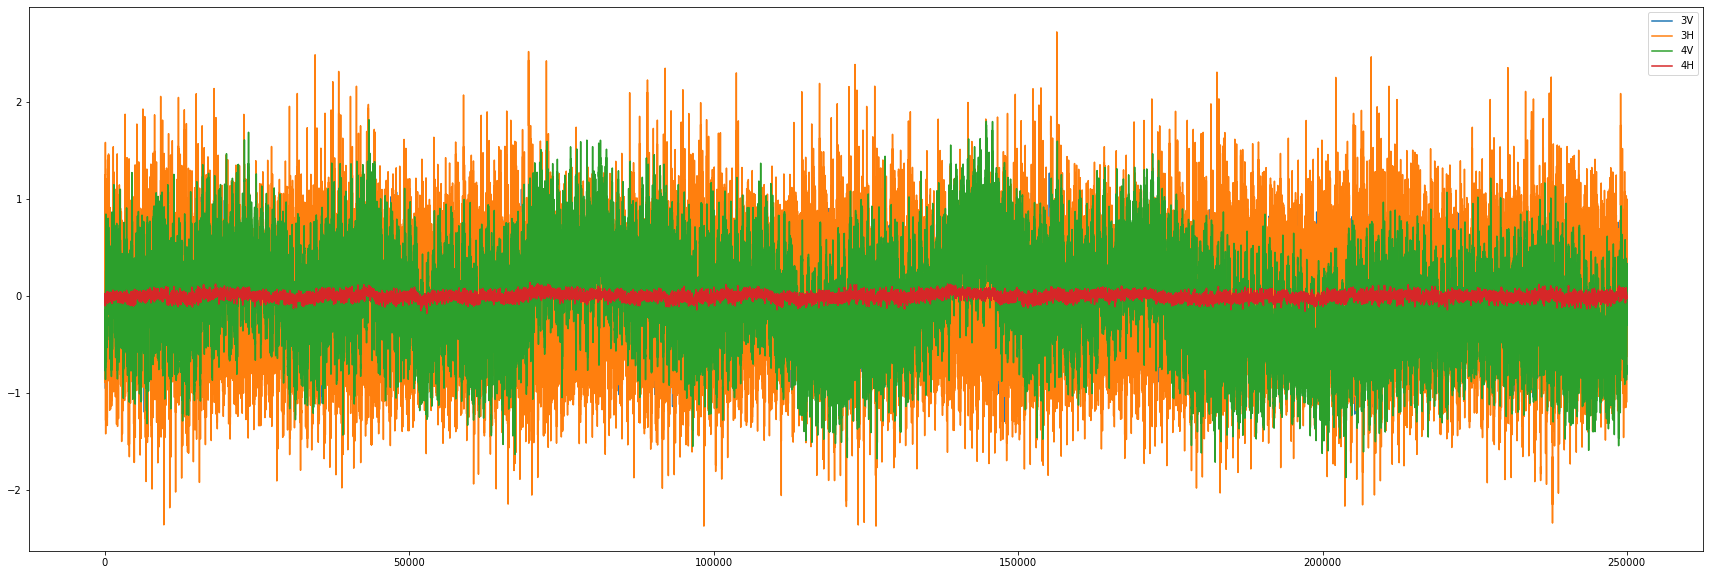

In [15]:
normal[['3V','3H','4V','4H']].plot(figsize=(30,10))

<AxesSubplot:>

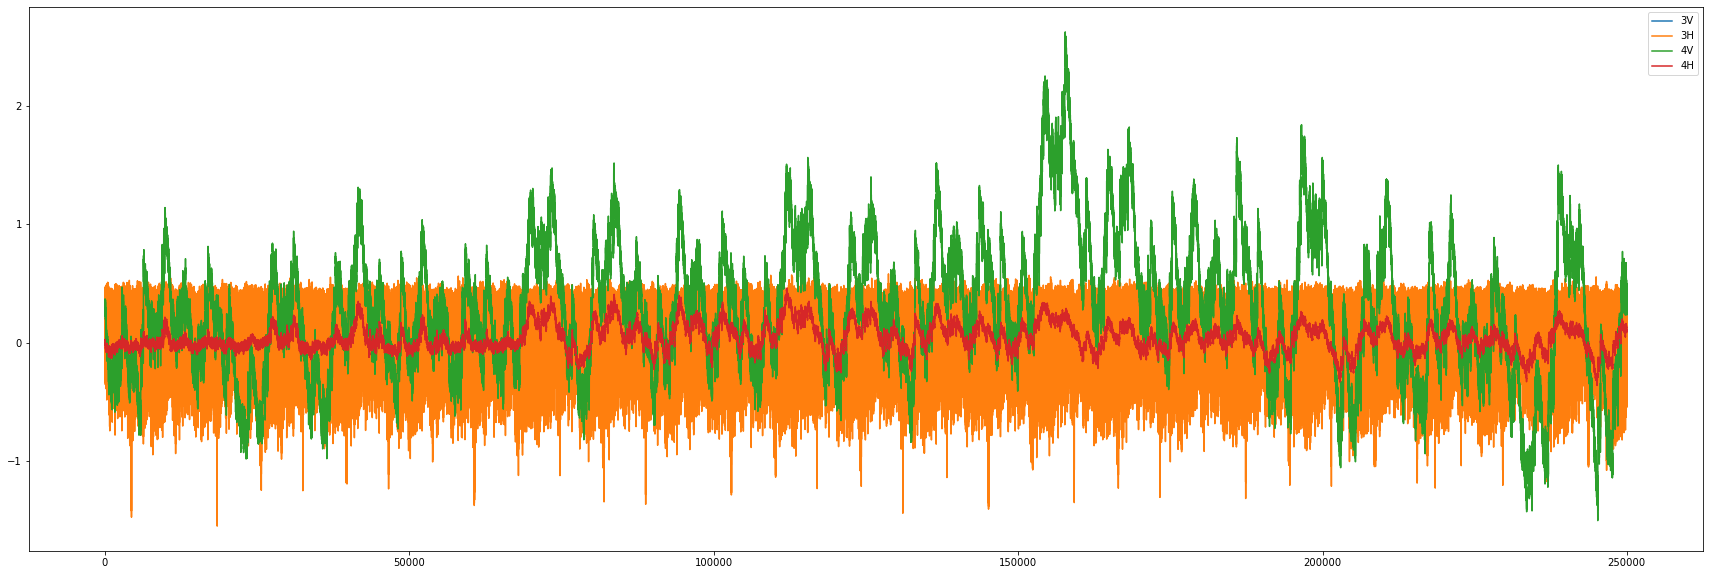

In [16]:
# Comparação com o desbalanceado
desbal[['3V','3H','4V','4H']].plot(figsize=(30,10))

CARREGANDO DADOS DO EQUIPAMENTO COM DESALINHAMENTO HORIZONTAL

In [17]:
desal_horizontal = pd.read_csv(r'C:/Users/Antonio/Documents/pos_IA/16projeto_integrado/dados/horizontal-misalignment/2.0mm/desalinhamento.csv',
                              sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone'])

In [18]:
desal_horizontal.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,4.51660,0.32252,0.027022,0.325620,0.12511,0.039569,-0.54543,0.20254
1,4.19750,0.18909,0.797620,0.477080,0.12035,0.039909,-0.42922,-0.25194
2,4.72800,0.21286,0.342540,0.370300,0.11386,0.039364,-0.34313,0.25660
3,2.89030,-0.88212,0.654440,0.157630,0.10543,0.038562,-0.25572,-0.18669
4,-0.97776,-0.20426,0.532990,0.008384,0.10095,0.038934,-0.10940,0.13778


<AxesSubplot:>

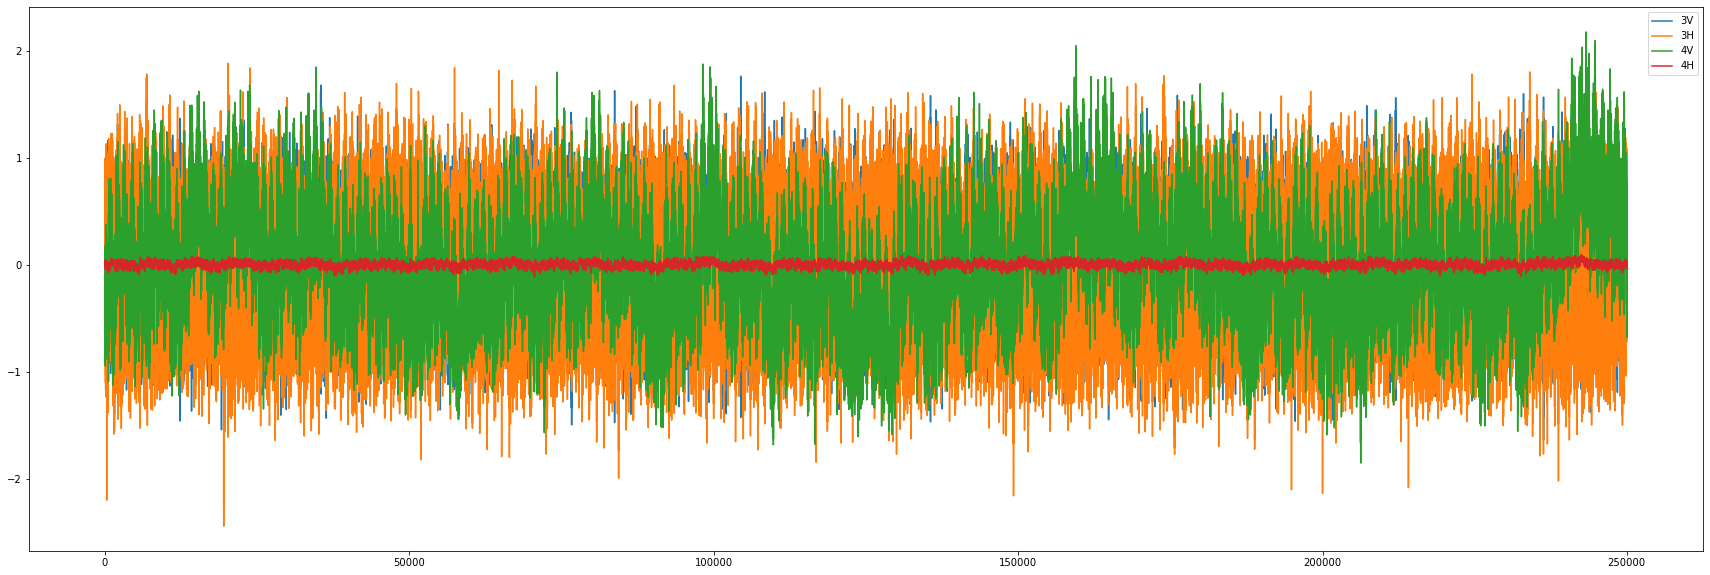

In [19]:
desal_horizontal[['3V','3H','4V','4H']].plot(figsize=(30,10))

CARREGANDO DADOS DO EQUIPAMENTO COM DESALINHAMENTO VERTICAL

In [20]:
desal_vertical = pd.read_csv(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\vertical-misalignment\1.90mm\vertical.csv',
                              sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone'])

In [21]:
desal_vertical.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,4.4052,-0.053549,0.10911,-0.589420,0.029952,0.013155,-0.280760,0.043712
1,4.4228,-1.259500,-0.37485,-0.062473,0.029599,0.014188,-0.497300,0.076617
2,4.3990,-0.152310,0.47631,0.468980,0.036490,0.020612,-0.416520,-0.129600
3,4.4244,-0.783380,-0.26150,0.841770,0.035681,0.020933,-0.296580,0.226340
4,4.4000,-0.382050,0.49618,1.005900,0.033273,0.020439,0.035147,-0.226370


<AxesSubplot:>

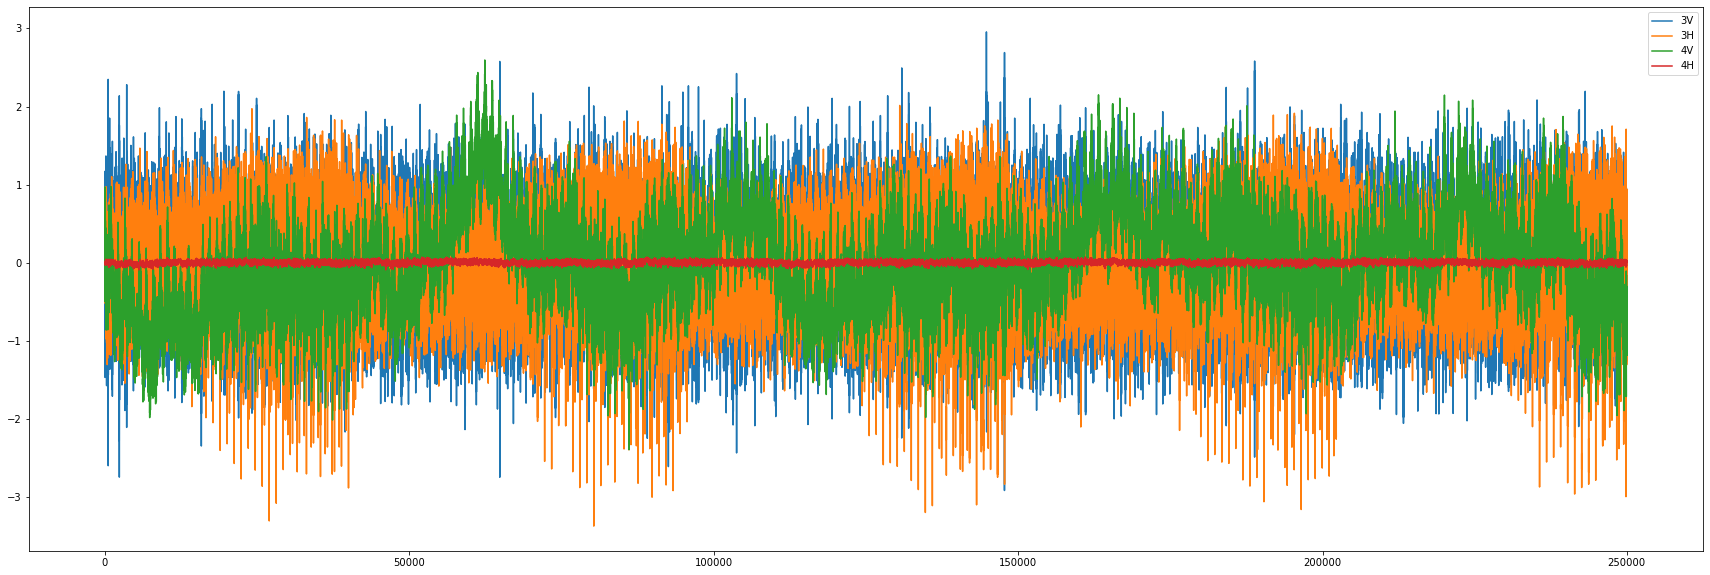

In [22]:
desal_vertical[['3V','3H','4V','4H']].plot(figsize=(30,10))